In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn import cluster, datasets 

n_samples = 1000
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05) 
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
blobs1, _ = datasets.make_blobs(n_samples=n_samples, random_state=10, center_box=(-2, 2),cluster_std=0.2)
blobs2, _ = datasets.make_blobs(n_samples=n_samples, random_state=4, center_box=(-2, 2),cluster_std=0.4)
blobs3, _ = datasets.make_blobs(n_samples=n_samples, random_state=7, center_box=(-2, 2),cluster_std=0.3)
no_structure, _ = np.random.rand(n_samples, 2), None

examples = [noisy_moons, noisy_circles, blobs1, blobs2, blobs3, no_structure]

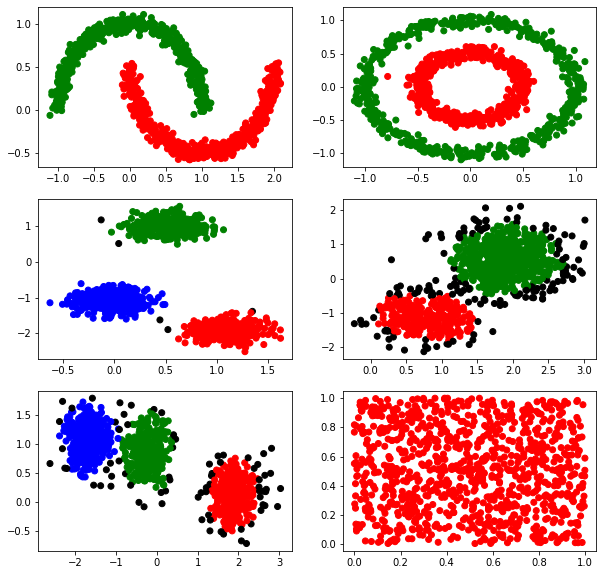

In [12]:
from sklearn.cluster import DBSCAN 

plt.figure(figsize=(10, 10))

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[4] = 'c'
colours[5] = 'm'
colours[6] = 'tab:pink'
colours[7] = 'tab:orange'
colours[8] = 'tab:olive'
colours[9] = 'tab:brown'
colours[-1] = 'k'
  
for num, i in enumerate(examples):
  db_default = DBSCAN(eps = 0.2, min_samples = 20).fit(i) 
  labels = db_default.labels_ 

  cvec = [colours[label] for label in labels] 

  plt.subplot(3, 2, num+1)
  plt.scatter(i[:, 0], i[:, 1], color = cvec)
plt.show()

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df = df.drop(df.columns[0], axis=1)
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.000000,0.0,0.000000,0.000000,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.000000,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.000000,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.000000,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.000000,0.0,0.000000,0.000000,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.000000,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.000000,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.000000,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.000000,0.0,0.000000,0.000000,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.000000,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.000000,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.000000,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.000000,0.0,0.000000,0.000000,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.000000,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.000000,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.000000,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.000000,0.0,0.000000,0.000000,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.000000,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.000000,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(
    [
      ("imputer", SimpleImputer(strategy="median")),
    ]
)
df_prepared = num_pipeline.fit_transform(df)
df_prepared = normalize(df_prepared)

array([[0.        , 0.00183895, 0.00297696, ..., 0.00813296, 0.00481957,
        0.        ],
       [0.        , 0.00054984, 0.00147347, ..., 0.00871776, 0.00194262,
        0.        ],
       [0.        , 0.0033539 , 0.00413268, ..., 0.00963688, 0.00160737,
        0.        ],
       ...,
       [0.        , 0.0028423 , 0.00324282, ..., 0.00828022, 0.00409122,
        0.00051316],
       [0.        , 0.00235576, 0.0025355 , ..., 0.00945873, 0.00520087,
        0.        ],
       [0.        , 0.00211546, 0.00346255, ..., 0.00895658, 0.00414014,
        0.        ]])

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
df_principal = pca.fit_transform(df_prepared) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['P1', 'P2'] 
df_principal 

,P1,P2
0,-0.056920,-0.082045
1,-0.001607,0.082631
2,-0.066280,-0.010366
3,-0.077986,-0.066873
4,-0.063931,-0.011263
...,...,...
796,-0.056405,-0.024994
797,-0.012920,0.050042
798,0.008534,0.024661
799,-0.050052,-0.080348


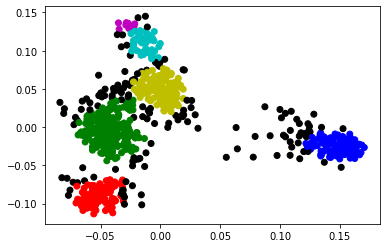

In [ ]:
from sklearn.cluster import DBSCAN 

db_default = DBSCAN(eps = 0.008, min_samples = 10).fit(df_principal) 
labels = db_default.labels_ 

colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[4] = 'c'
colours[5] = 'm'
colours[6] = 'tab:pink'
colours[7] = 'tab:orange'
colours[8] = 'tab:olive'
colours[9] = 'tab:brown'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] 

plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec) 
  
plt.show() 

In [7]:
from sklearn.preprocessing import OrdinalEncoder

labels = pd.read_csv('labels.csv')
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


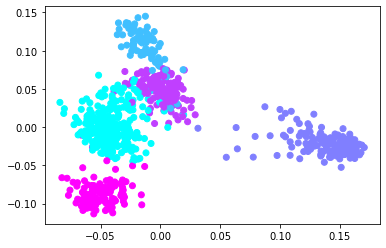

In [ ]:
enc = OrdinalEncoder()
labels = enc.fit_transform(labels[['Class']])
labels *= 100
plt.scatter(df_principal['P1'], df_principal['P2'], c=labels , cmap=plt.cm.cool)
plt.show()